## Block 1

In [1]:
# Q1: Import libraries and dataset
# All imports in the first block.
import pandas as pd
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
y = diabetes.target

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


## Block 2

In [2]:
# Q2: Import other necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecat

## Block 3

In [3]:
# Q3: Create a function that does the requirements according to the question, specified below
def main(X, y):
    # firstly train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    # fit a linear regression model
    model = LinearRegression(fit_intercept = True).fit(X_train, y_train)
    # predict the y data for X test from the model
    predicted = X_test.dot(model.coef_) + model.intercept_
    # create two subplots if there is only single input
    fig,axes = plt.subplots(X_train.shape[1],2,figsize=[14,8 * X_train.shape[1]])
    if X.shape[1] == 1:
        sns.scatterplot(x = X_train[X_train.columns[0]], y = y_train, ax = axes[0])
        sns.lineplot(x = X_train[X_train.columns[0]],y = X_train.dot(model.coef_) + model.intercept_,ax=axes[0])        
        sns.scatterplot(x = X_test[X_test.columns[0]], y = y_test, ax = axes[1])
        sns.lineplot(x = X_test[X_test.columns[0]],y = predicted,ax=axes[1])
        axes[0].text(0, 15, "R^2 value: " + str(model.score(X_train, X_train.dot(model.coef_) + model.intercept_)))
        axes[1].text(0, 25, "R^2 value: " + str(model.score(X_test, y_test)))
        return model.score(X_test, y_test)
    
    # iterate through the features if we have multiple columns
    for i in range(X_train.shape[1]):
        sns.scatterplot(x = X_train[X_train.columns[i]], y = y_train, ax = axes[i,0])
        sns.lineplot(x = X_train[X_train.columns[i]], y = X_train.dot(model.coef_) + model.intercept_, ax = axes[i,0])
        sns.scatterplot(x = X_test[X_test.columns[i]], y = y_test, ax = axes[i,1])
        sns.lineplot(x = X_test[X_test.columns[i]], y = predicted, ax = axes[i,1])
    return model.score(X_test, y_test)

## Block 4

The function output (i.e. coefficient of determination) is 0.4849086635905802


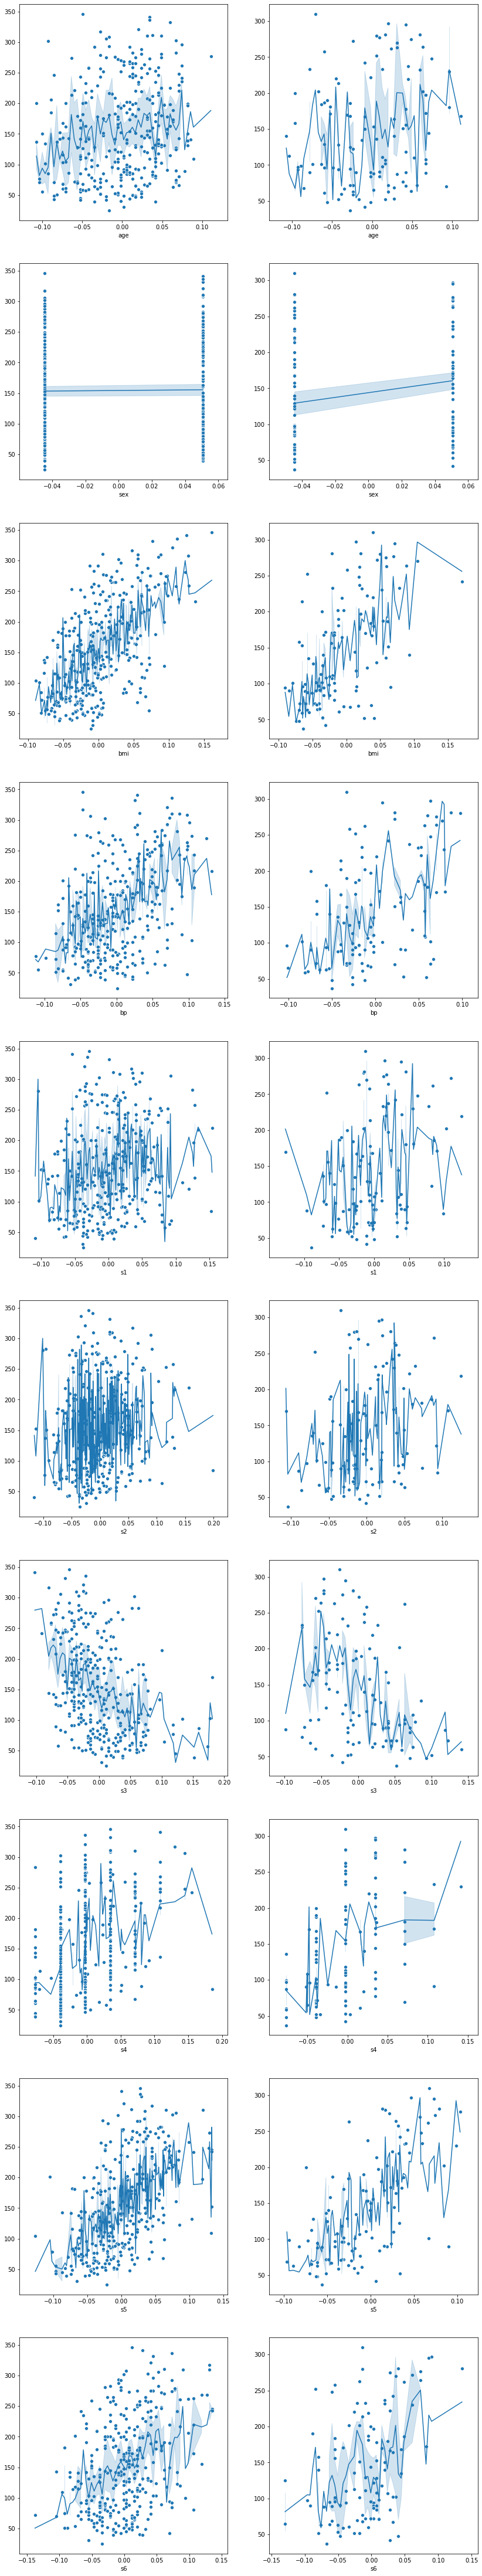

In [4]:
# Q4: Show that the function works
print("The function output (i.e. coefficient of determination) is", main(X, y))

## Block 5

The best single feature is s5 , with r^2 0.42157673425681785


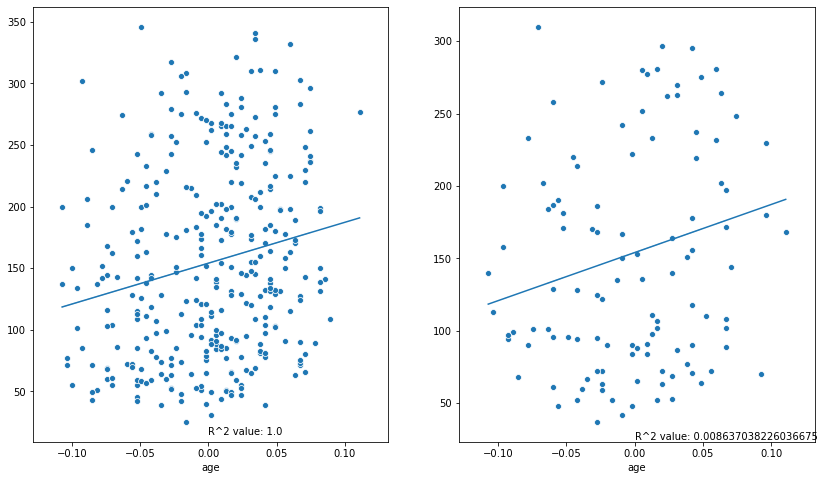

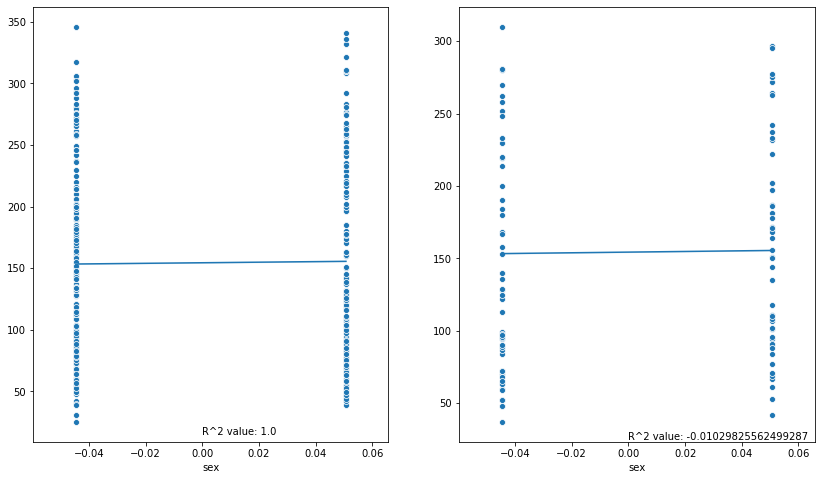

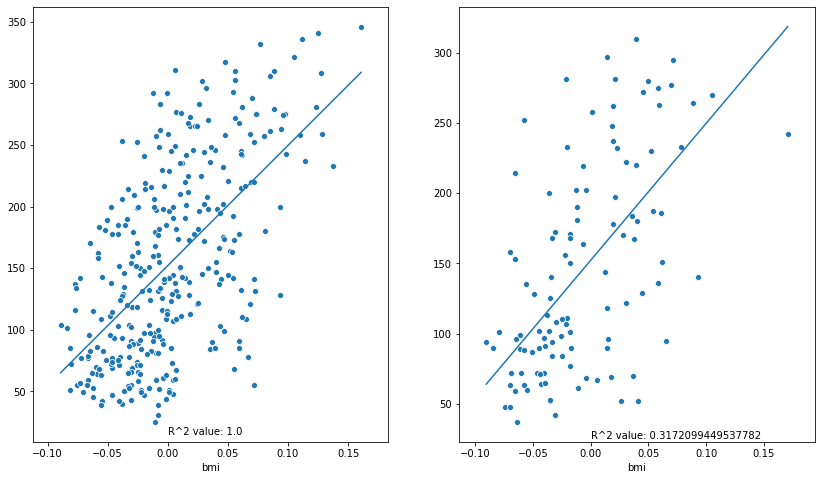

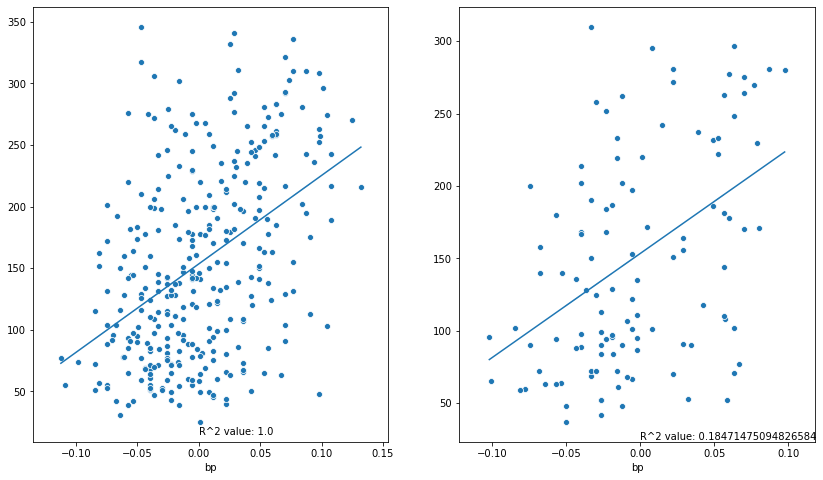

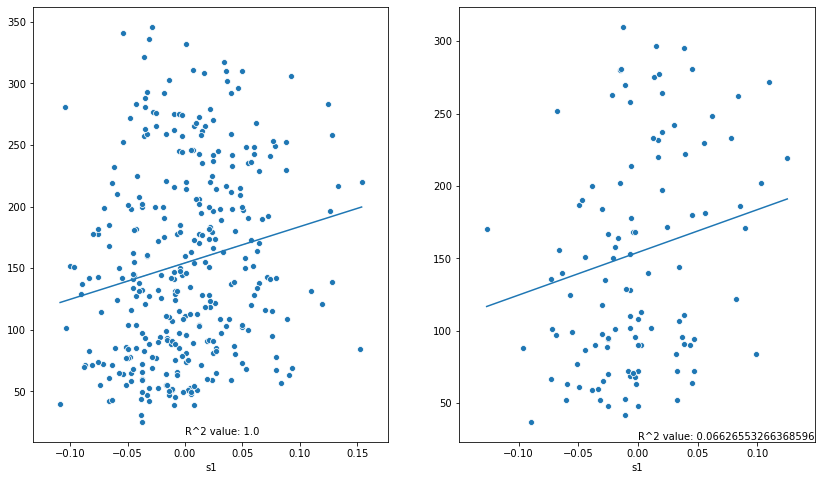

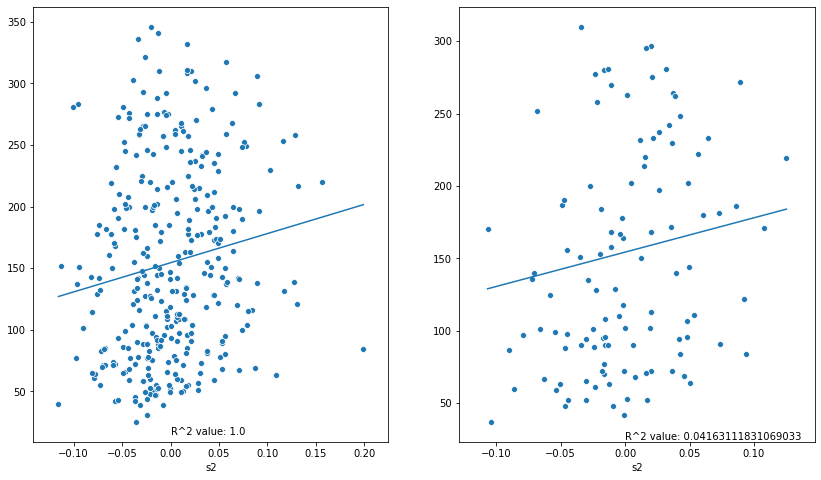

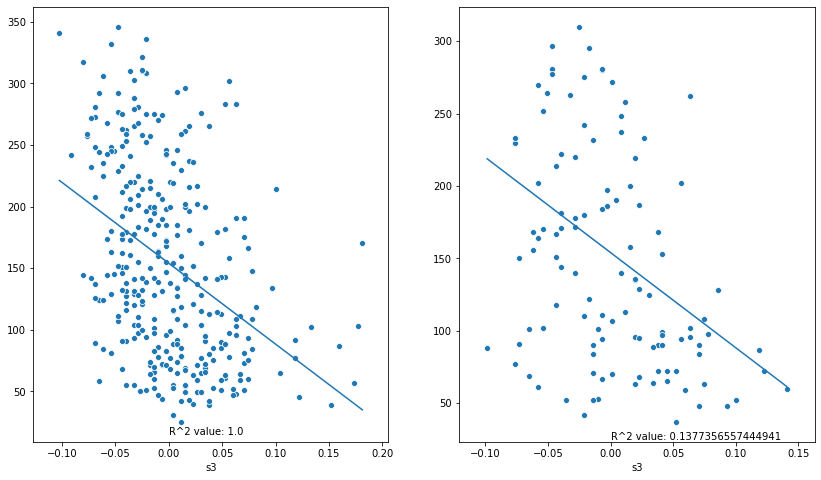

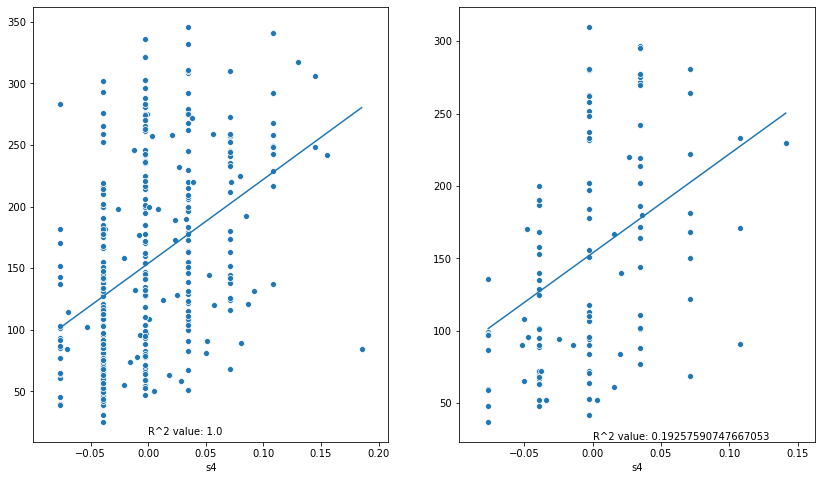

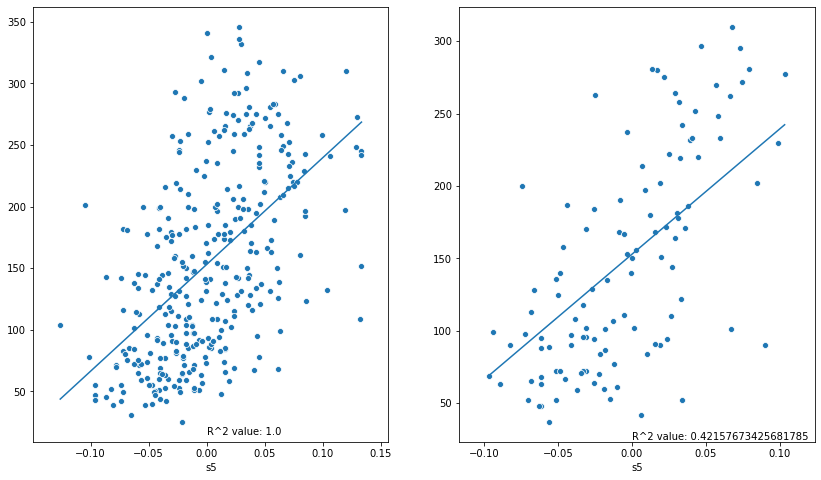

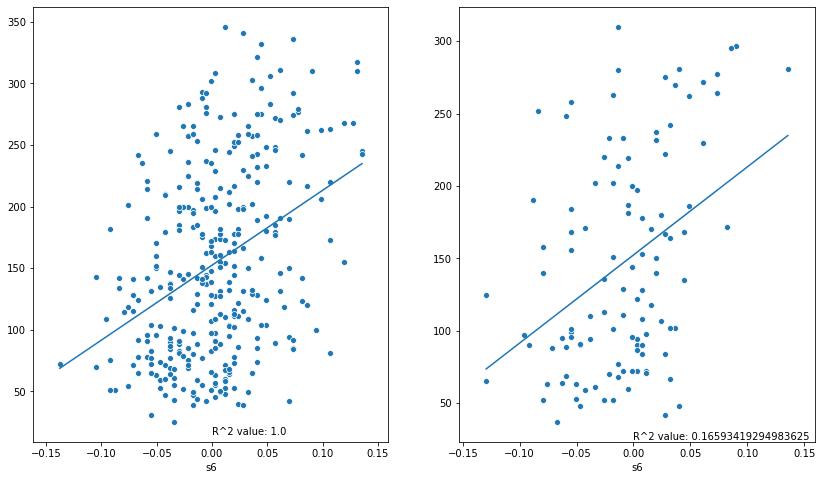

In [5]:
# Q5 & Q6
# Using the for loop to goes through all of the features, to choose the best single feature
# Also plot the scatterplot and regressed line
best_r2 = -float("inf")
best_feature = None
for col in X.columns:
    r2 = main(X[[col]], y)
    if r2 > best_r2:
        best_feature = col
        best_r2 = r2
print("The best single feature is", best_feature, ", with r^2", best_r2)